In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
palette_color = sns.color_palette('pastel')

#untuk dapat melihat seluruh kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<ipython-input-2-e9a6b8f31d09>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# TITANIC - DATA VISUALIZATION

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Dataset Titanic merupakan salah satu set data paling terkenal dan banyak dipelajari dalam dunia data science dan machine learning. Popularitasnya berasal dari cerita tragis tenggelamnya RMS Titanic pada perjalanan perdana tahun 1912, yang menyebabkan lebih dari 1.500 penumpang dan awak kapal meninggal. Dataset ini memberikan informasi detil tentang status kelangsungan hidup penumpang Titanic, termasuk usia, jenis kelamin, kelas tiket, tarif yang dibayar, dan banyak lagi.

source: https://www.kaggle.com/competitions/titanic/

In [4]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
print(df.shape)

(891, 12)


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### **Penjelasan dataset**
Setiap penumpang dalam dataset Titanic diidentifikasi dengan
 - PassengerId  
 - Survived: status kelangsungan hidupnya (1 untuk selamat, 0 untuk tidak selamat).

Informasi tambahan meliputi:
- Pclass (kelas sosial ekonomi penumpang),
- Name (nama penumpang),
- Sex (jenis kelamin),
- Age (umur),
- SibSp (jumlah saudara atau pasangan),
- Parch (jumlah orang tua atau anak),
- Ticket (nomor tiket),
- Fare (tarif perjalanan),
- Cabin (nomor kabin), dan
- Embarked (pelabuhan keberangkatan).

Tipe data:
- Numeric - Continuous : Fare, Age
- Numeric - Discrete : SibSp, Parch
- Category Ordinal : pclass (1st = Upper, 2nd = Middle, 3rd = Lower)
- Category Nominal : sex, embarked

In [7]:
#analisa deskriptif untuk tipe data numerik
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Visualisasi Setiap Kolom / Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


<Axes: xlabel='count', ylabel='Survived'>

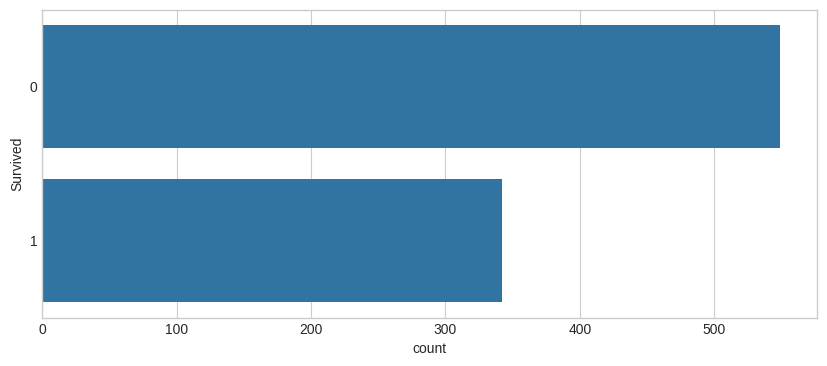

In [9]:
# perbandingan jumlah penumpang yang selamat
fig = plt.figure(figsize=(10,4))
print(df['Survived'].value_counts())
# df['Survived'].value_counts().plot.bar()
sns.countplot(y='Survived', data=df)

**Kesimpulan:** lebih banyak penumpang yang tidak selamat

male      577
female    314
Name: Sex, dtype: int64


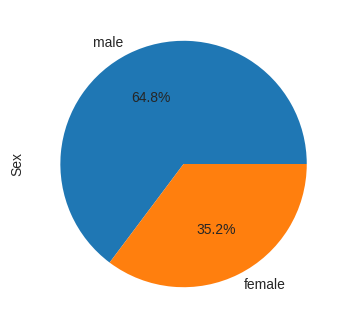

In [10]:
# perbandingan jenis kelamin penumpang
fig = plt.figure(figsize=(10,4))
# sns.countplot(y='Sex', data=df)
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Sex'].value_counts())

**Kesimpulan:** jumlah penumpang laki-laki jauh lebih banyak dibandingkan perempuan

S    644
C    168
Q     77
Name: Embarked, dtype: int64


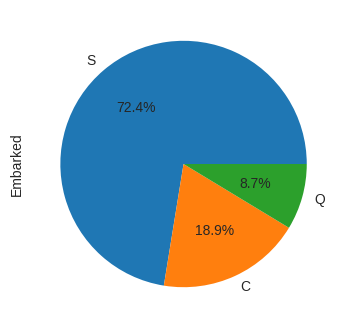

In [11]:
# perbandingan tempat keberangkatan
fig = plt.figure(figsize=(10,4))
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Embarked'].value_counts())

**Kesimpulan:** mayoritas penumpang (72.4%) berangkat dari kota S

<Axes: xlabel='count', ylabel='Pclass'>

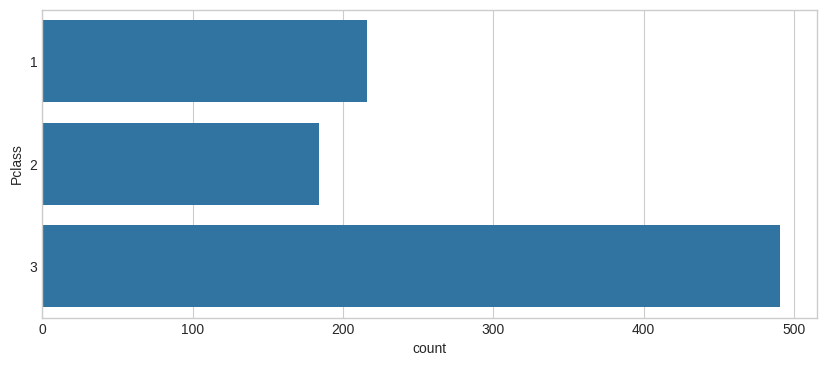

In [12]:
# Task 1 - Gambarkan Distribusi pclass, gunakan visualisasi yang cocok kemudian berikan kesimpulan
fig = plt.figure(figsize=(10,4))
sns.countplot(y='Pclass', data=df)

**Kesimpulan:** Mayoritas penumpang adalah penumpang kelas 3, dan jumlah penumpang kelas 2 lebih sedikit dibandingkan dengan kelas 3 & 1.

<Axes: xlabel='Age', ylabel='Count'>

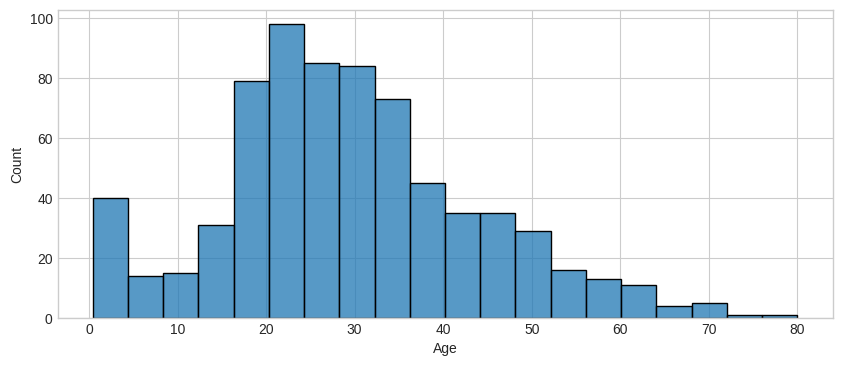

In [13]:
# Task 2 - Gambarkan Distribusi umur seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan
fig = plt.figure(figsize=(10,4))
sns.histplot(x='Age', data=df)

**Kesimpulan:** Mayoritas penumpang berada dalam rentang umur antara 20 hingga 30 tahun

<Axes: xlabel='Fare', ylabel='Count'>

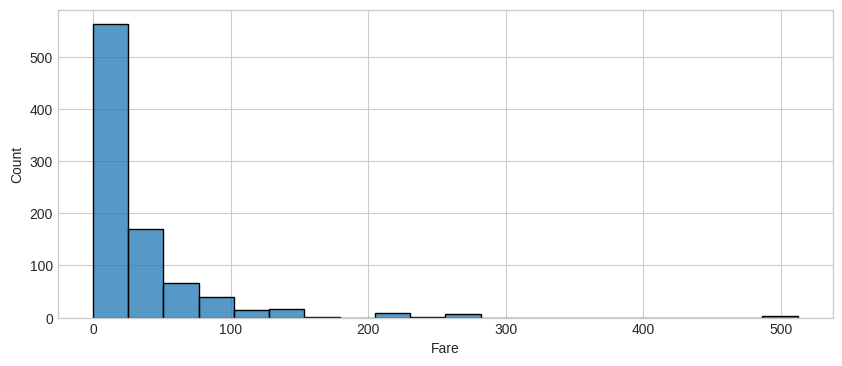

In [14]:
# Task 3 - Gambarkan Distribusi fare seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan
fig = plt.figure(figsize=(10,4))
sns.histplot(x= 'Fare', data=df, bins=20)

**Kesimpulan:** Mayoritas penumpang membayar tarif yang relatif rendah

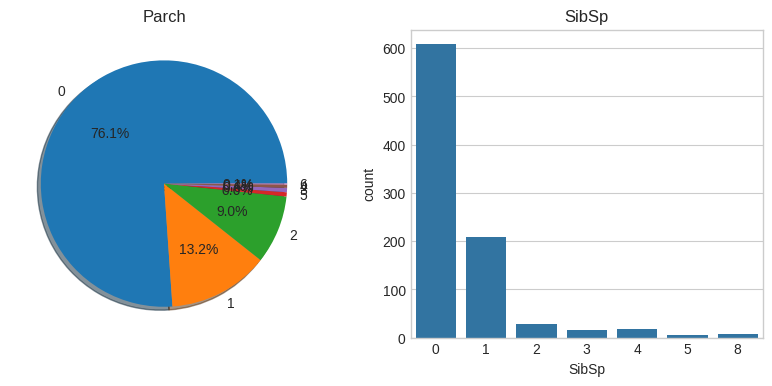

In [15]:
#persebaran Parch & SibSp
f,ax=plt.subplots(1,2,figsize=(10,4))
df['Parch'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Parch')
ax[0].set_ylabel('')
sns.countplot(x='SibSp',data=df,ax=ax[1])
ax[1].set_title('SibSp')
plt.show()

**Kesimpulan:** Mayoritas penumpang adalah solo traveler

## Bivariate Analysis for Survived

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<ipython-input-17-5eaa00afb487>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()


<Axes: >

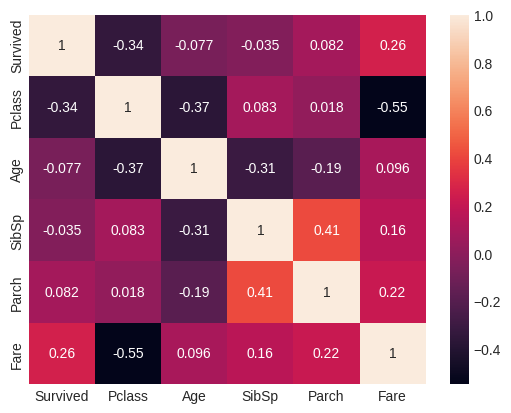

In [17]:
# Task 4 : tampilkan heatmap correlation untuk kolom 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'
# dan tuliskan kesimpulan yang menarik dari heatmap tersebut
corr = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True)

Kesimpulan`:
- Terdapat korelasi negatif yang signifikan antara kelas penumpang (Pclass) dan keselamatan (Survived),
  menunjukkan bahwa semakin tinggi kelas penumpang, semakin rendah kemungkinan bertahan hidup.
- Terdapat juga korelasi positif yang moderat antara tarif (Fare) dan keselamatan (Survived),
  menunjukkan bahwa penumpang dengan tarif yang lebih tinggi cenderung memiliki peluang bertahan hidup yang lebih tinggi.
- Tidak terlihat korelasi yang signifikan antara umur (Age), jumlah saudara (SibSp), dan jumlah orang tua/anak (Parch)
 dengan keselamatan (Survived) berdasarkan heatmap ini.

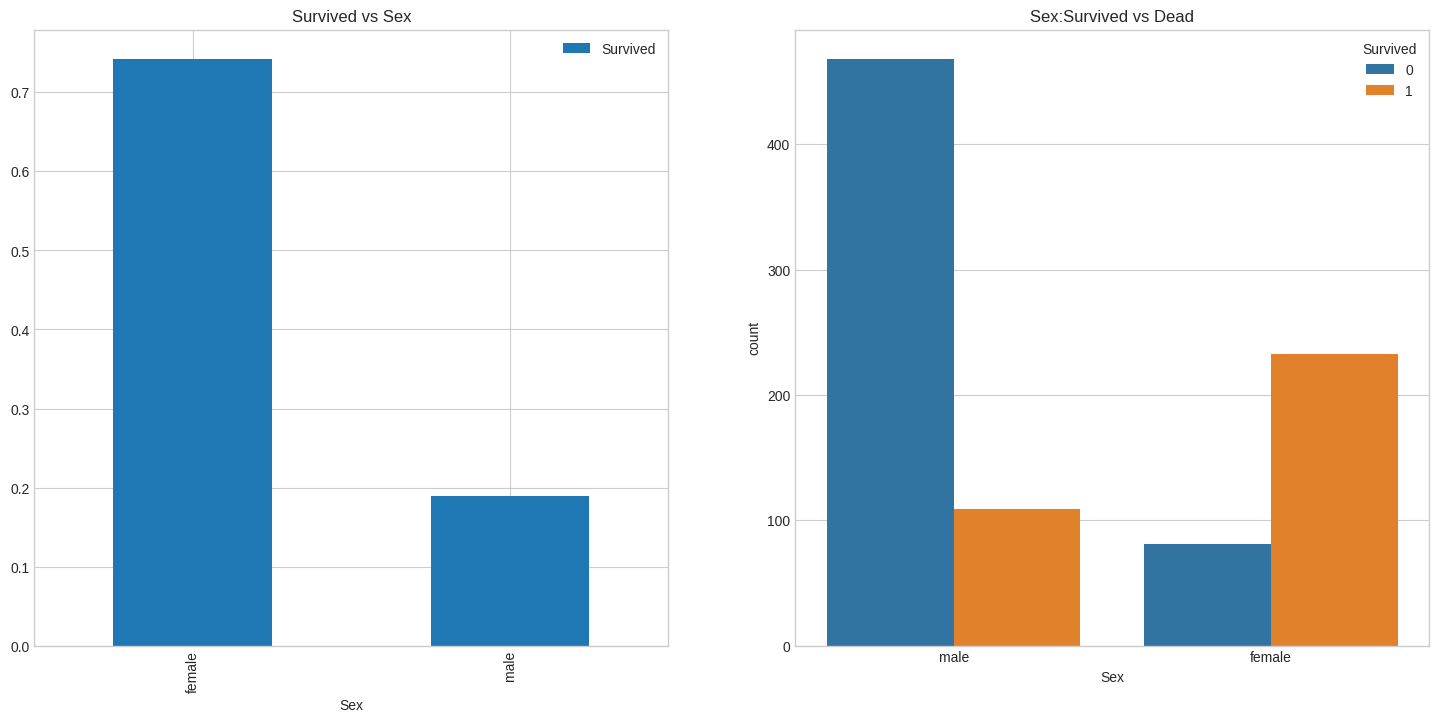

In [18]:
# Perbandingan Sex dengan Survived
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

**Kesimpulan:** pada plot di atas memiliki distribusi yang berbeda antara male dan female, dimana mayoritas male tidak selamat sedangkan mayoritas female selamat

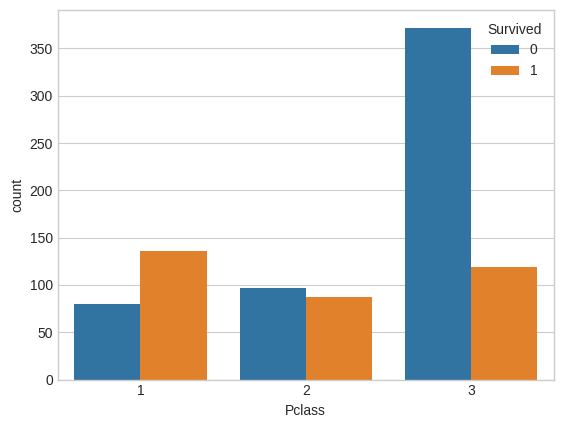

In [19]:
# Task 5 - Gambarkan Distribusi perbandingan antara Pclass dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan

sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()

**Kesimpulan:**
- Penumpang kelas 1 memiliki tingkat kelangsungan hidup yang jauh lebih tinggi dibandingkan dengan penumpang kelas lainnya.
- Penumpang kelas 3 memiliki tingkat kelangsungan hidup yang paling rendah, dengan tingkat tidak selamat yang tinggi.

Menunjukkan bahwa kelas sosial atau ekonomi memiliki pengaruh yang kuat terhadap kemungkinan bertahan hidup penumpang.

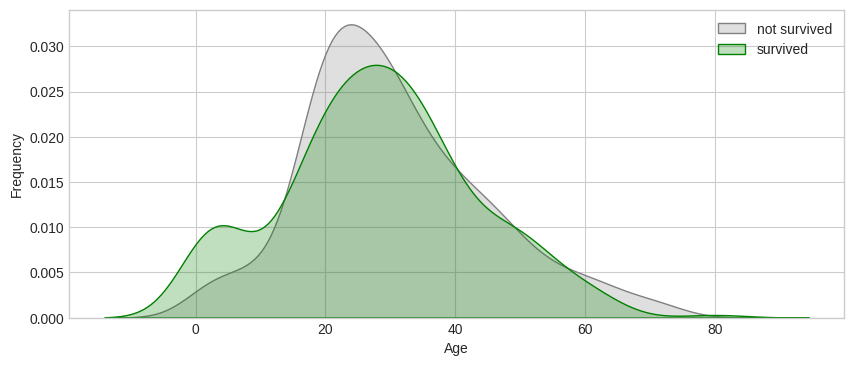

In [20]:
# Perbandingan Age dengan Survived dengan Kernel Density Plot
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',fill=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='green',fill=True, label='survived')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.legend()

**Kesimpulan:** Tidak ada yang perbedaan yang terlihat plot ini, kecuali bagian paling kiri distribusinya. Ini mungkin mengisyaratkan kemungkinan bahwa anak-anak dan bayi menjadi prioritas.

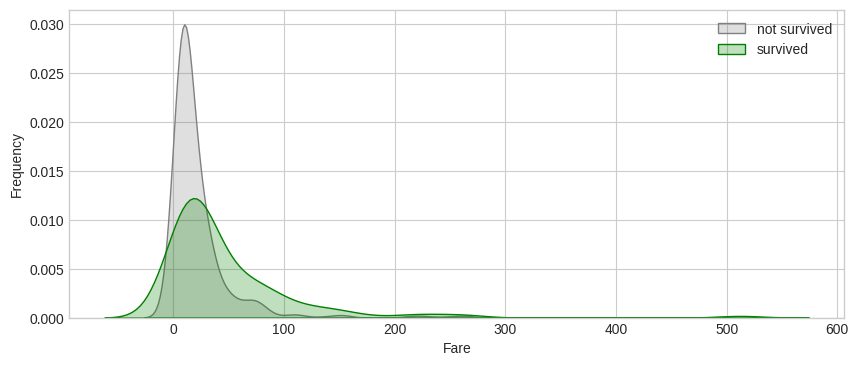

In [21]:
# Task 6 - Gambarkan Distribusi perbandingan antara Fare dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan

fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='gray',fill=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='green',fill=True, label='survived')
plt.xlabel("Fare")
plt.ylabel('Frequency')
plt.legend()

**Kesimpulan:** Penumpang yang membayar dg nominal belasan (rendah) cenderung tidak selamat, sehingga penumpang dengan tarif yang lebih tinggi cenderung memiliki peluang bertahan hidup yang lebih tinggi.

## Multivariate Analysis

<Axes: xlabel='Pclass', ylabel='Age'>

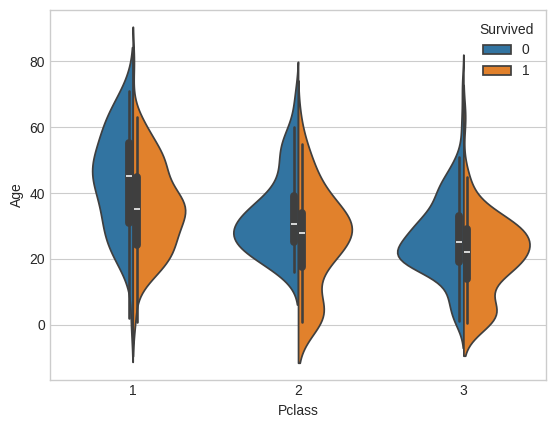

In [22]:
# Analisis Pclass, Age dan Survived
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)

<Axes: xlabel='Sex', ylabel='Age'>

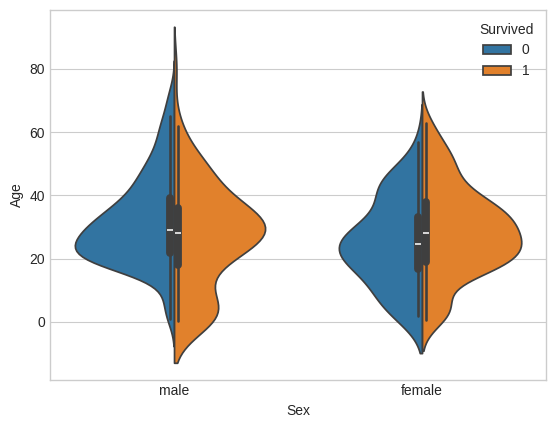

In [23]:
# Analisis Sex, Age dan Survived
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

In [24]:
# Task 7-10 Buatlah tambahan 4 plot analisa, Anda dibebaskan untuk membuat data visualisasi
# dengan kombinasi data yang berbeda untuk menemukan informasi menarik mengenai dataset Titanic ini
# dan berikan kesimpulan Anda terhadap analisa yang anda buat

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


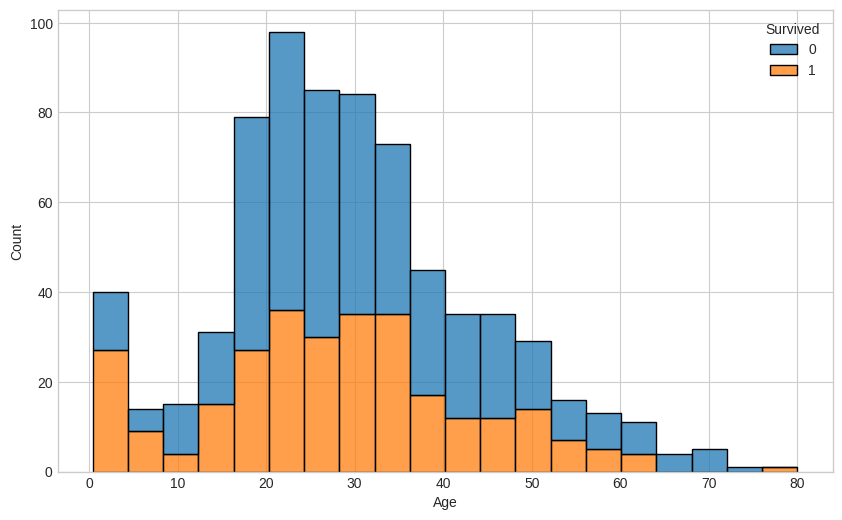

In [26]:
# 7. Perbandingan antara Usia penumpang dan Survived
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=df, multiple="stack")
plt.show()

**Kesimpulan:** Mayoritas Penumpang tidak selamat berada dalam rentang usia 20 hingga 30

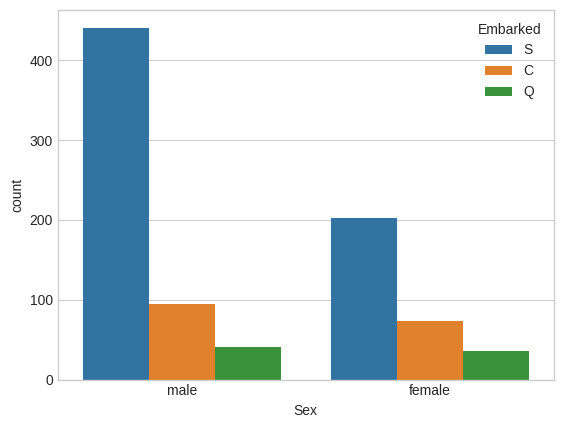

In [27]:
# 8. Perbandingan antara jenis kelamin penumpang dan Embarked
sns.countplot(x='Sex', hue='Embarked', data=df)
plt.show()

**Kesimpulan:** Mayoritas penumpang dengan jenis kelamin laki-laki dan perempuan berangkat dari Port keberangkatan S

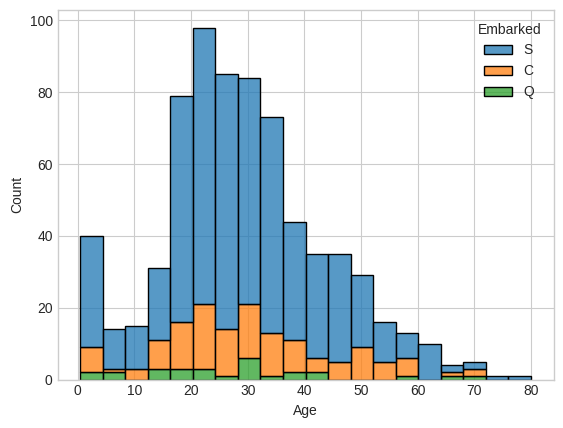

In [28]:
# 9. Perbandingan antara usia penumpang dan Embarked
sns.histplot(x='Age', hue='Embarked', data=df, multiple='stack')
plt.show()

**Kesimpulan**: Port S memiliki proporsi penumpang muda dan dewasa (rentang usia 20-40) yang lebih tinggi daripada port lain

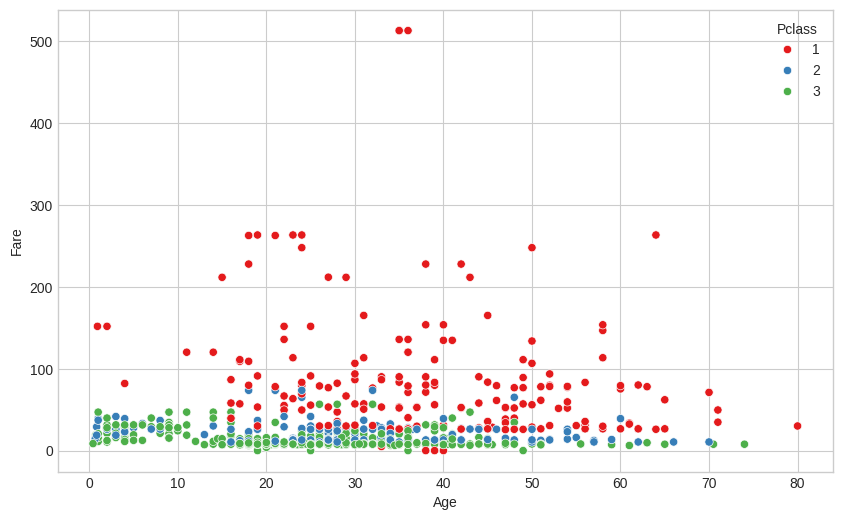

In [29]:
# . Distribusi Umur dan Tarif Berdasarkan Kelas Penumpang
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', palette='Set1')
plt.show()

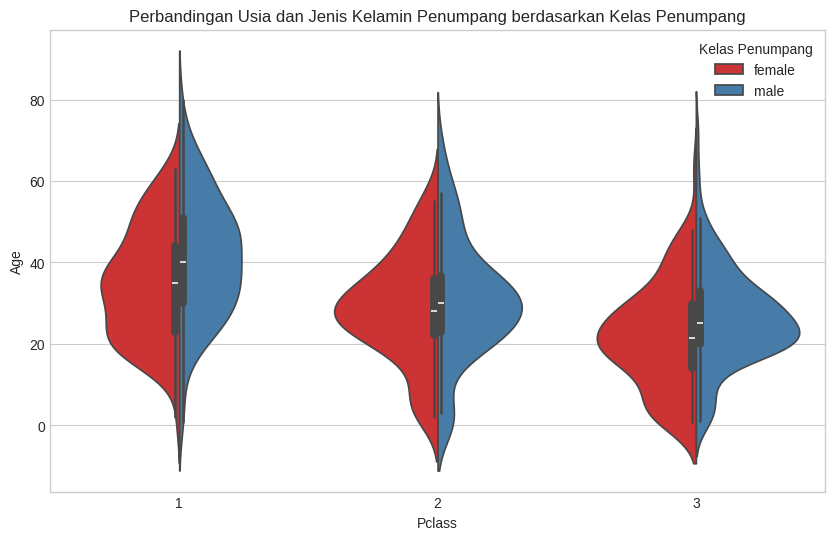

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', palette='Set1', split=True)
plt.title('Perbandingan Usia dan Jenis Kelamin Penumpang berdasarkan Kelas Penumpang')
plt.legend(title='Kelas Penumpang')
plt.show()

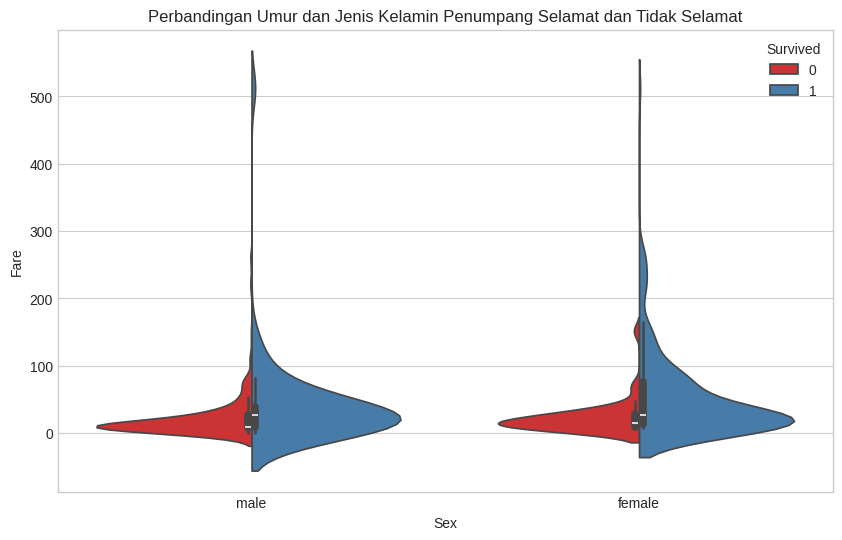

In [31]:
# 9. Perbandingan Umur dan jenis kelamin Penumpang Selamat dan Tidak Selamat
# plt.figure(figsize=(10, 6))
# sns.swarmplot(data=df, x='Age', y='Sex' ,hue='Survived', palette='Set1')
# plt.ylabel('Frequency')
# plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Sex', y='Fare', hue='Survived', palette='Set1', split=True)
plt.title('Perbandingan Umur dan Jenis Kelamin Penumpang Selamat dan Tidak Selamat')
plt.show()

Kesimpulan:

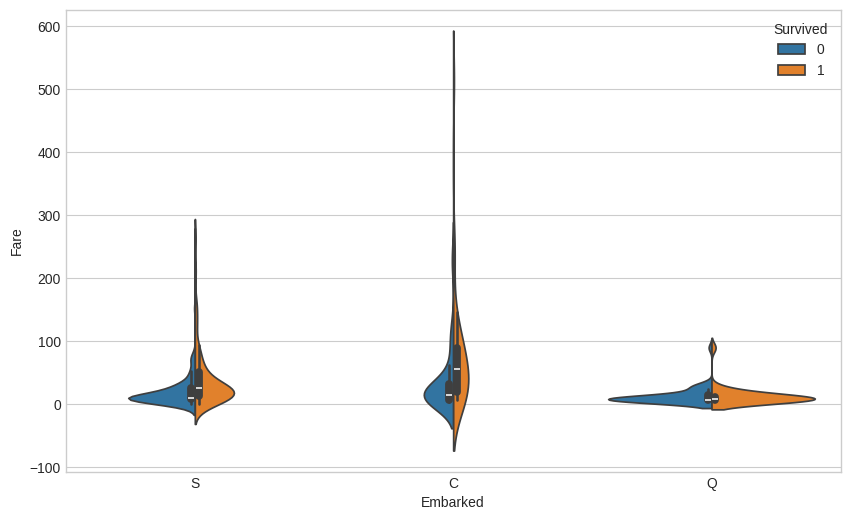

In [32]:
# . Persebaran Penumpang Berdasarkan Tarif dan Port Keberangkatan
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Embarked', y='Fare', hue='Survived', split=True)
plt.show()

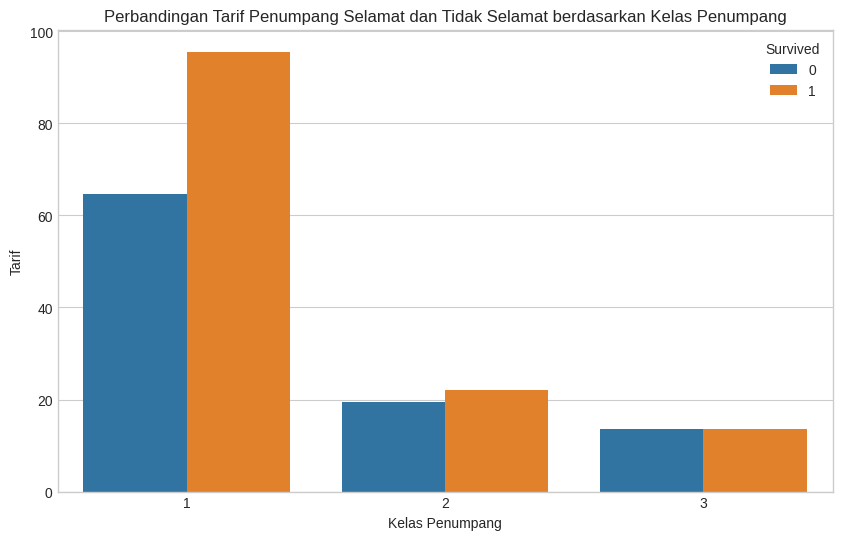

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived', errorbar=None)
plt.title('Perbandingan Tarif Penumpang Selamat dan Tidak Selamat berdasarkan Kelas Penumpang')
plt.xlabel('Kelas Penumpang')
plt.ylabel('Tarif')
plt.show()